In [8]:
# 1. Install required libraries (if not already in Colab)
!pip install scikit-learn pandas matplotlib seaborn


In [9]:

# 2. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
# 3. Load your 3 datasets from path (directly)
sentiment_file = '/content/Final balanced dataset.csv'  # Path to your Sentiment dataset
fake_real_file = '/content/fake balanced dataset.csv'  # Path to your Fake/Real dataset
category_file = '/content/Final Product Category Balanced Dataset.csv'    # Path to your Category dataset


In [11]:
# 4. Define a function to train and evaluate a model
def train_and_evaluate(file_path, text_col, label_col, label_map, title):
    print(f"\n===== {title} =====\n")

    # Load dataset
    df = pd.read_csv(file_path)
    df = df[[text_col, label_col]]
    df.dropna(inplace=True)

    # Rename columns for consistency
    df.rename(columns={text_col: 'review', label_col: 'target'}, inplace=True)

    # Encode labels
    df['label'] = df['target'].map(label_map)

    # Train-test split (60% train, 40% test)
    X_train, X_test, y_train, y_test = train_test_split(
        df['review'], df['label'], test_size=0.4, random_state=42, stratify=df['label'])

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Train Logistic Regression
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_tfidf, y_train)

    # Predict and Evaluate
    y_pred = model.predict(X_test_tfidf)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_map.keys()))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_map.keys(), yticklabels=label_map.keys())
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [12]:
# 5. Set label maps for each dataset

# For Sentiment (Negative, Neutral, Positive)
sentiment_label_map = {'negative': 0, 'neutral': 1, 'positive': 2}

# For Fake/Real
fake_real_label_map = {'fake': 0, 'real': 1}

# For Product Categories (Example — adjust these based on real class names if needed)
category_label_map = {
    'fashion': 0,
    'electronics': 1,
    'health': 2,
    'automotive': 3,
    'home': 4
}


===== Sentiment Analysis (TF-IDF + Logistic Regression) =====

Accuracy: 0.8679227419049422

Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.87      0.87      3520
     neutral       0.84      0.86      0.85      3521
    positive       0.91      0.88      0.89      3521

    accuracy                           0.87     10562
   macro avg       0.87      0.87      0.87     10562
weighted avg       0.87      0.87      0.87     10562



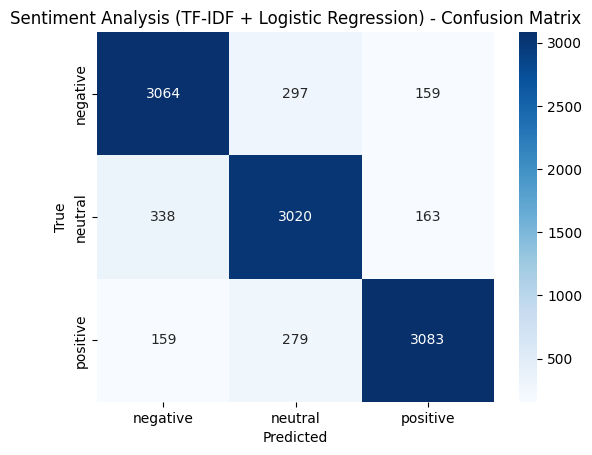


===== Fake vs Real Classification (TF-IDF + Logistic Regression) =====

Accuracy: 0.8228975128229943

Classification Report:
               precision    recall  f1-score   support

        fake       0.85      0.78      0.82      5167
        real       0.80      0.86      0.83      5166

    accuracy                           0.82     10333
   macro avg       0.82      0.82      0.82     10333
weighted avg       0.82      0.82      0.82     10333



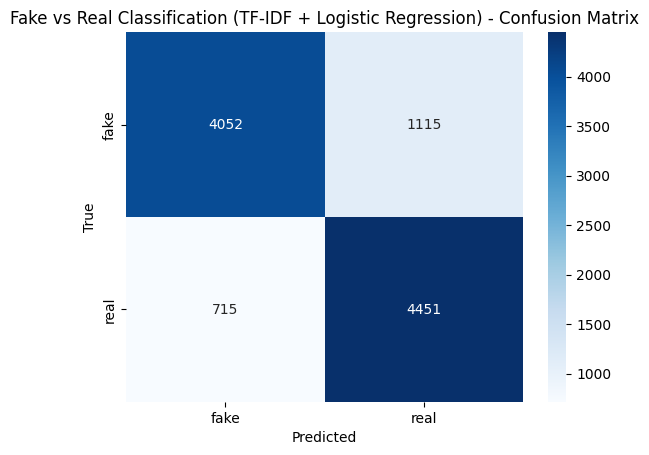


===== Product Category Classification (TF-IDF + Logistic Regression) =====

Accuracy: 0.7899571887263646

Classification Report:
               precision    recall  f1-score   support

     fashion       0.83      0.84      0.84      2243
 electronics       0.63      0.59      0.61      2242
      health       0.94      1.00      0.97      2242
  automotive       0.68      0.67      0.68      2243
        home       0.84      0.86      0.85      2242

    accuracy                           0.79     11212
   macro avg       0.79      0.79      0.79     11212
weighted avg       0.79      0.79      0.79     11212



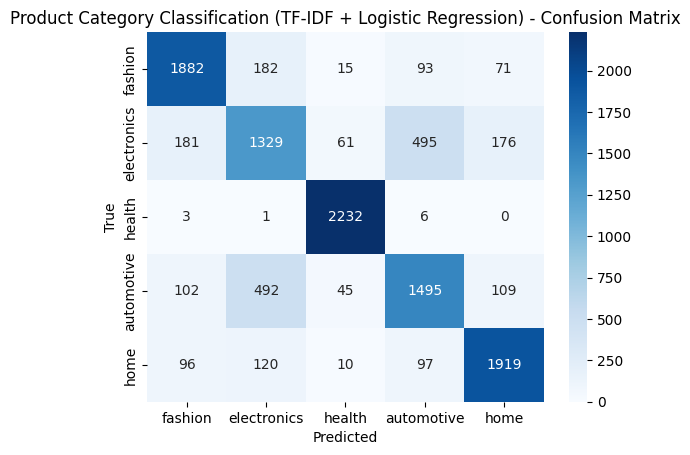

In [13]:
# Sentiment Analysis
train_and_evaluate(
    file_path=sentiment_file,
    text_col='reviewContent',
    label_col='sentiment',
    label_map=sentiment_label_map,
    title="Sentiment Analysis (TF-IDF + Logistic Regression)"
)

# Fake vs Real Classification
train_and_evaluate(
    file_path=fake_real_file,
    text_col='reviewContent',
    label_col='label',
    label_map=fake_real_label_map,
    title="Fake vs Real Classification (TF-IDF + Logistic Regression)"
)

# Product Category Classification
train_and_evaluate(
    file_path=category_file,
    text_col='reviewContent',
    label_col='categoryLabel',
    label_map=category_label_map,
    title="Product Category Classification (TF-IDF + Logistic Regression)"
)